# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st


# Import API key
weather_api_key = '36da6d25546951ab492cd0752c6e5d80'


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
url = "http://api.openweathermap.org/data/2.5/weather"

units = "metric"

query_url = f"{url}?appid={weather_api_key}&units={units}&q="

query_url

'http://api.openweathermap.org/data/2.5/weather?appid=36da6d25546951ab492cd0752c6e5d80&units=metric&q='

In [21]:
city = "albany"

output = requests.get(query_url + city).json()

output

{'coord': {'lon': -73.97, 'lat': 42.6},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 2.56,
  'feels_like': -1.88,
  'temp_min': 0.56,
  'temp_max': 4.44,
  'pressure': 1040,
  'humidity': 25},
 'visibility': 16093,
 'wind': {'speed': 1.5},
 'clouds': {'all': 1},
 'dt': 1584901771,
 'sys': {'type': 1,
  'id': 3273,
  'country': 'US',
  'sunrise': 1584874484,
  'sunset': 1584918620},
 'timezone': -14400,
 'id': 5106841,
 'name': 'Albany',
 'cod': 200}

In [36]:
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_name = []

query_url = f"{url}?appid={weather_api_key}&units={units}&q="

for city in cities:
    
    try: 
    
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        city_name.append(city)
        
               
        print(f"the city name is {city}")        
    
    except:
        
        print("city not found")


the city name is butaritari
the city name is victoria
the city name is meulaboh
the city name is sao jose da coroa grande
the city name is tura
the city name is rikitea
city not found
the city name is ushuaia
the city name is mataura
the city name is malanville
the city name is hurghada
the city name is port alfred
the city name is panzhihua
city not found
the city name is sao felix do xingu
the city name is busselton
the city name is saint george
city not found
the city name is tambopata
the city name is puerto ayora
the city name is waddan
the city name is bambous virieux
the city name is yellowknife
the city name is chokurdakh
the city name is luderitz
the city name is vung tau
the city name is nikolskoye
the city name is nome
the city name is tuktoyaktuk
the city name is upernavik
the city name is kuah
the city name is pisco
the city name is jagdalpur
the city name is leningradskiy
the city name is svetlyy
the city name is bredasdorp
city not found
the city name is yulara
the city 

the city name is mogadishu
the city name is mount isa
the city name is zemio
the city name is vestmannaeyjar
the city name is zeya
the city name is codrington
the city name is tecoanapa
the city name is nanakuli
the city name is rabat
the city name is tay ninh
the city name is yining
city not found
the city name is zadar
the city name is cascais
the city name is watrous
the city name is trincomalee
the city name is lerwick
the city name is cayenne
the city name is kaseda
the city name is salta
the city name is san patricio
the city name is dingle
the city name is storforshei
the city name is faya
the city name is zhezkazgan
the city name is enterprise
the city name is usinsk
the city name is totness
the city name is mahajanga
the city name is lata
the city name is anadyr
the city name is tezu
the city name is margate
the city name is padang
the city name is natal
the city name is cabo san lucas
the city name is karangampel
the city name is tirumullaivasal
the city name is richmond
the 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
weather_df = pd.DataFrame({"City": city_name,
                          "Cloudiness": cloudiness,
                          "Country": country,
                          "Date": date,
                          "Humidity": humidity,
                          "Lat": lat,
                          "Lng": lon, 
                          "Max Temp": max_temp,
                          "Wind Speed": wind_speed})

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,butaritari,84,KI,1584903142,79,3.07,172.79,28.15,6.47
1,victoria,0,HK,1584903076,88,22.29,114.16,25.00,2.60
2,meulaboh,40,ID,1584903202,78,4.14,96.13,28.25,3.39
3,sao jose da coroa grande,79,BR,1584903202,79,-8.90,-35.15,28.35,7.14
4,tura,0,IN,1584902903,48,25.52,90.22,21.75,1.18


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

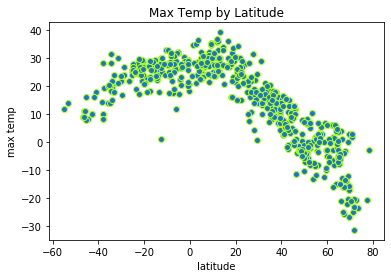

In [48]:
plt.scatter(weather_df.iloc[:,5], weather_df.iloc[:,7], edgecolor='greenyellow')
plt.title('Max Temp by Latitude')
plt.xlabel('latitude')
plt.ylabel('max temp')
plt.show()

#### Latitude vs. Humidity Plot

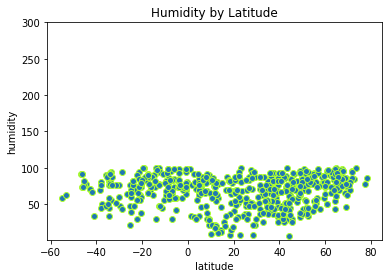

In [55]:
plt.scatter(weather_df.iloc[:,5], weather_df.iloc[:,4], edgecolor='greenyellow')
plt.title('Humidity by Latitude')
plt.ylim(top=300)
plt.ylim(bottom=1)
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.show()

#### Latitude vs. Cloudiness Plot

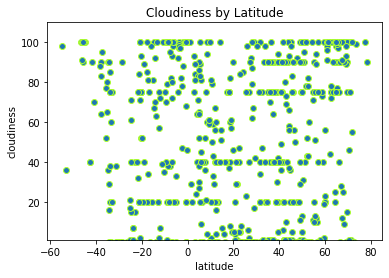

In [63]:
plt.scatter(weather_df.iloc[:,5], weather_df.iloc[:,1], edgecolor='greenyellow')
plt.title('Cloudiness by Latitude')
plt.ylim(top=110)
plt.ylim(bottom=1)
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.show()

#### Latitude vs. Wind Speed Plot

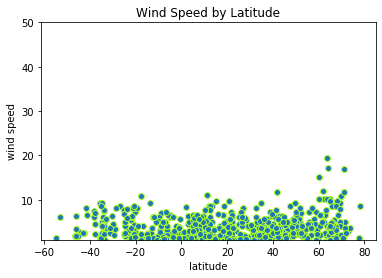

In [64]:
plt.scatter(weather_df.iloc[:,5], weather_df.iloc[:,8], edgecolor='greenyellow')
plt.title('Wind Speed by Latitude')
plt.ylim(top=50)
plt.ylim(bottom=1)
plt.xlabel('latitude')
plt.ylabel('wind speed')
plt.show()

## Linear Regression

In [78]:
# Create Northern and Southern Hemisphere DataFrames


In [127]:
n_df = weather_df.loc[(weather_df["Lat"] >= 0)]
s_df = weather_df.loc[(weather_df["Lat"] < 0)]

s_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,0
3,sao jose da coroa grande,79.0,BR,1.584903e+09,79.0,-8.90,-35.15,28.35,7.14,NaN
5,rikitea,15.0,PF,1.584903e+09,73.0,-23.12,-134.97,25.65,1.66,NaN
6,ushuaia,98.0,AR,1.584903e+09,58.0,-54.80,-68.30,12.00,1.50,NaN
7,mataura,100.0,NZ,1.584903e+09,91.0,-46.19,168.86,8.89,1.79,NaN
10,port alfred,60.0,ZA,1.584903e+09,94.0,-33.59,26.89,20.56,0.89,NaN
...,...,...,...,...,...,...,...,...,...,...
554,concordia,0.0,AR,1.584903e+09,51.0,-31.39,-58.02,30.00,3.60,NaN
555,luwuk,100.0,ID,1.584903e+09,74.0,-0.95,122.79,27.85,1.44,NaN
564,innisfail,81.0,AU,1.584903e+09,90.0,-17.53,146.03,22.65,2.28,NaN
566,crixas,67.0,BR,1.584903e+09,82.0,-14.55,-49.97,27.35,1.33,NaN


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

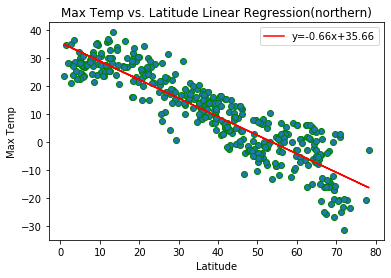

In [135]:
x_values = n_df["Lat"]
y_values = n_df["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(n_df.iloc[:,5], n_df.iloc[:,7], edgecolor='green')
plt.plot(x_values,regress_values,"r", label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Max Temp vs. Latitude Linear Regression(northern)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.legend()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

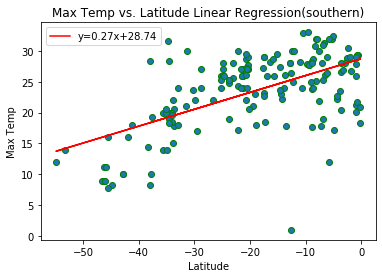

In [136]:
x_values = s_df["Lat"]
y_values = s_df["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(s_df.iloc[:,5], s_df.iloc[:,7], edgecolor='green')
plt.plot(x_values,regress_values,"r", label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Max Temp vs. Latitude Linear Regression(southern)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.legend()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

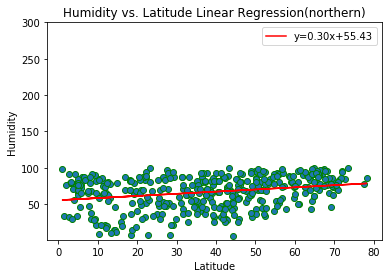

In [137]:
x_values = n_df["Lat"]
y_values = n_df["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(n_df.iloc[:,5], n_df.iloc[:,4], edgecolor='green')
plt.plot(x_values,regress_values,"r", label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Humidity vs. Latitude Linear Regression(northern)')
plt.ylim(top=300)
plt.ylim(bottom=1)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.legend()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

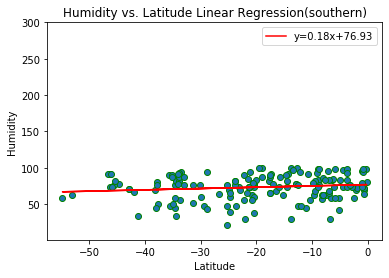

In [138]:
x_values = s_df["Lat"]
y_values = s_df["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(s_df.iloc[:,5], s_df.iloc[:,4], edgecolor='green')
plt.plot(x_values,regress_values,"r", label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Humidity vs. Latitude Linear Regression(southern)')
plt.ylim(top=300)
plt.ylim(bottom=1)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.legend()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

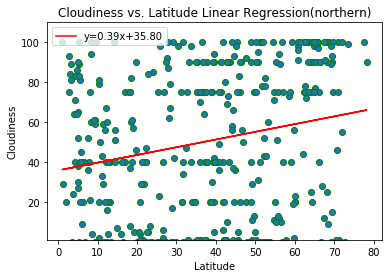

In [144]:
x_values = n_df["Lat"]
y_values = n_df["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(n_df.iloc[:,5], n_df.iloc[:,1], edgecolor='green')
plt.plot(x_values,regress_values,"r", label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Cloudiness vs. Latitude Linear Regression(northern)')
plt.ylim(top=110)
plt.ylim(bottom=1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.legend()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

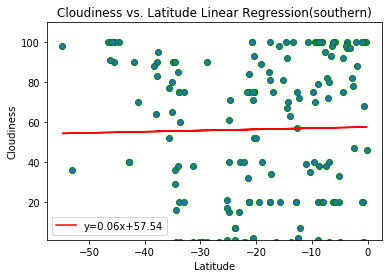

In [145]:
x_values = s_df["Lat"]
y_values = s_df["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(s_df.iloc[:,5], s_df.iloc[:,1], edgecolor='green')
plt.plot(x_values,regress_values,"r", label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Cloudiness vs. Latitude Linear Regression(southern)')
plt.ylim(top=110)
plt.ylim(bottom=1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.legend()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

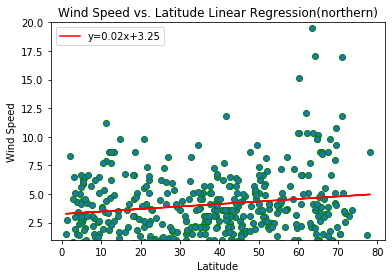

In [148]:
x_values = n_df["Lat"]
y_values = n_df["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(n_df.iloc[:,5], n_df.iloc[:,8], edgecolor='green')
plt.plot(x_values,regress_values,"r", label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Wind Speed vs. Latitude Linear Regression(northern)')
plt.ylim(top=20)
plt.ylim(bottom=1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

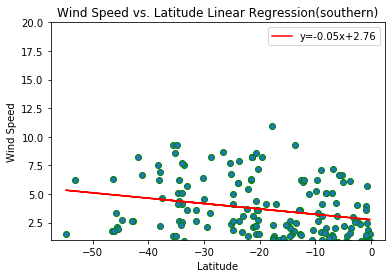

In [147]:
x_values = s_df["Lat"]
y_values = s_df["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(s_df.iloc[:,5], s_df.iloc[:,8], edgecolor='green')
plt.plot(x_values,regress_values,"r", label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Wind Speed vs. Latitude Linear Regression(southern)')
plt.ylim(top=20)
plt.ylim(bottom=1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

In [150]:
weather_df.to_csv("weather_data.csv", encoding="utf-8")